# Support Vector Regression

Support vector regression (SVR) is a type of support vector machine (SVM) that is used for regression tasks. It tries to find a function that best predicts the continuous output value for a given input value.

SVR can use both linear and non-linear kernels. A linear kernel is a simple dot product between two input vectors, while a non-linear kernel is a more complex function that can capture more intricate patterns in the data. The choice of kernel depends on the data’s characteristics and the task’s complexity.

In [26]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [27]:
# import the data
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [28]:
# Call the label encoder function 
le = LabelEncoder()

In [29]:
# encode the categorical data
df['le_sex'] = le.fit_transform(df['sex'])
df['le_smoker'] = le.fit_transform(df['smoker'])
df['le_day'] = le.fit_transform(df['day'])
df['le_time'] = le.fit_transform(df['time'])

In [30]:
# drop the original categorical columns
df.drop(['sex', 'smoker', 'day', 'time'], axis=1, inplace=True)

In [31]:
df.head()

,total_bill,tip,size,le_sex,le_smoker,le_day,le_time
0,16.99,1.01,2,0,0,2,0
1,10.34,1.66,3,1,0,2,0
2,21.01,3.50,3,1,0,2,0
3,23.68,3.31,2,1,0,2,0
4,24.59,3.61,4,0,0,2,0


In [32]:
# lets make X and y in our data
X = df.drop(['tip'], axis=1)
y = df['tip']

In [33]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
# random_state = 42 is used for reproducibility, see in heatmap plot

In [34]:
model = SVR()

In [35]:
# call the model
model = SVR()
# train the model
model.fit(X_train, y_train)

SVR()

In [36]:
# predict the model
y_pred = model.predict(X_test)

In [37]:
# evaluate the model by regression
mse_reg = metrics.mean_squared_error(y_test, y_pred)
rmse_reg = np.sqrt(mse_reg)
r2_score = metrics.r2_score(y_test, y_pred)
mae_reg = metrics.mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse_reg}')
print(f'Root Mean Squared Error: {rmse_reg}')
print(f'R2 Score: {r2_score}')
print(f'Mean Absolute Error: {mae_reg}')

Mean Squared Error: 0.7433839857676959
Root Mean Squared Error: 0.8621971849685522
R2 Score: 0.43605668149581234
Mean Absolute Error: 0.627215842994358


# Ploting of the Model

<Axes: >

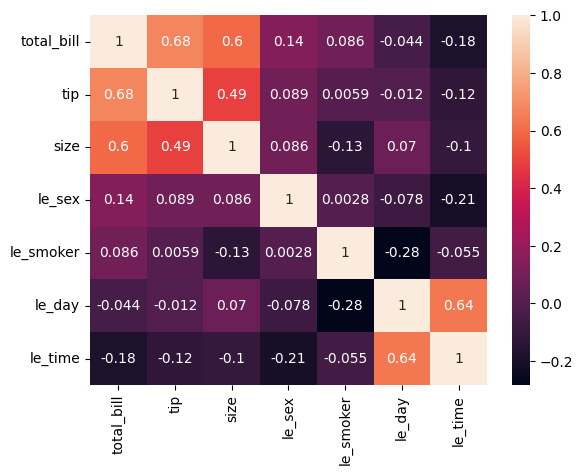

In [38]:
# plot the heatmap
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='tip'>

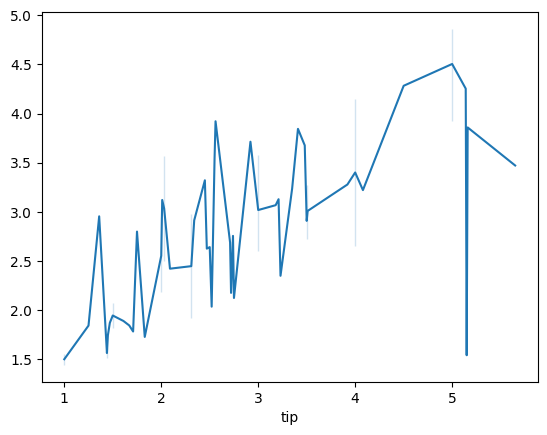

In [39]:
# plot the line graph
sns.lineplot(x=y_test, y=y_pred)

In [40]:
# New dataFrame just for plotting (LinePlot) to show the legend
new_df = pd.DataFrame({'Actual Values':y_test,'Predicted Values':y_test})

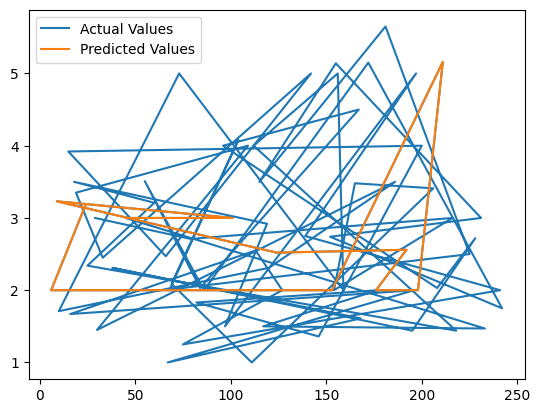

In [41]:
plt.figure()

plt.plot(new_df['Actual Values'].iloc[:], label='Actual Values')
plt.plot(new_df['Predicted Values'].iloc[0:11], label="Predicted Values")

plt.legend()
plt.show()

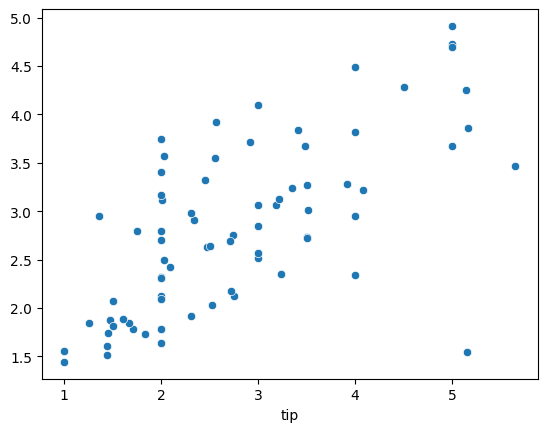

In [42]:
plot = sns.scatterplot(x=y_test, y=y_pred)

C:\Users\DELL\AppData\Local\Temp\ipykernel_5552\2302364944.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<Axes: xlabel='tip', ylabel='Density'>

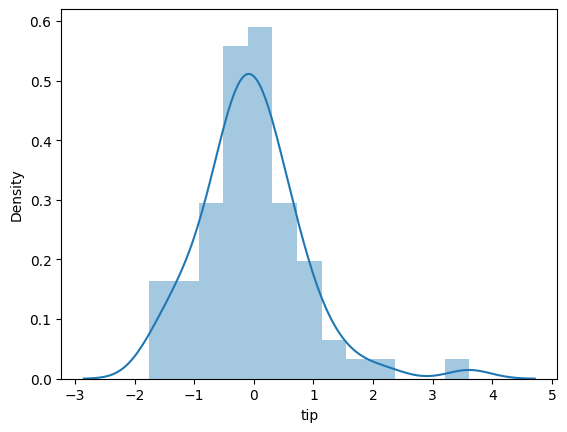

In [43]:
# plot the distribution
sns.distplot(y_test-y_pred)

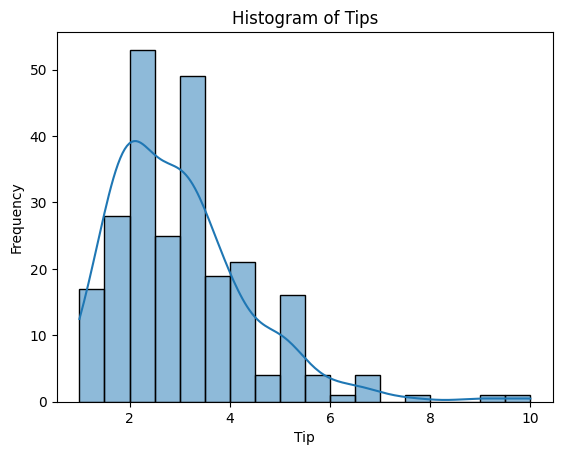

In [44]:
# plot the histogram
sns.histplot(data=df, x='tip', kde=True)
plt.xlabel('Tip')
plt.ylabel('Frequency')
plt.title('Histogram of Tips')
plt.show()

# Save and Load the Model

In [49]:
# save the model
import pickle
pickle.dump(model, open('./svr_model.pkl', 'wb'))
# Here wb means write binary

In [52]:
# load the model
import pickle
model_load = pickle.load(open('./svr_model.pkl', 'rb'))
# Here rb means read binary

In [55]:
model_load.predict(X_test)

array([3.06787891, 1.6377497 , 3.74965222, 3.8584821 , 2.11940896,
       2.79588912, 3.9213092 , 2.03557201, 2.34969452, 2.52071765,
       2.84497471, 1.8712932 , 1.81689459, 2.32213326, 1.72802939,
       2.95449174, 2.95390863, 3.27810661, 2.62602152, 4.73013496,
       3.32085028, 3.23736235, 2.34574124, 1.74496039, 3.27022493,
       1.91843498, 1.78289742, 3.67230568, 2.70153238, 4.91441771,
       4.48694635, 1.61150164, 2.9136281 , 3.12861313, 2.73037941,
       3.7132113 , 2.07446298, 4.69927282, 2.12405941, 3.40622018,
       1.84299271, 2.30946638, 3.54640372, 1.84467728, 1.78323679,
       1.44302748, 1.8900811 , 2.97672772, 1.51592061, 2.17580879,
       3.5693125 , 3.81493708, 4.28221758, 2.49932547, 3.00934104,
       2.08839629, 1.54155562, 2.79926616, 2.75563805, 2.56529214,
       4.25339187, 2.72376705, 3.47146032, 2.64115795, 3.12070135,
       3.22116038, 2.42189119, 1.55840187, 3.84421558, 3.6760919 ,
       3.17210771, 4.10059789, 2.68797455, 3.0604707 ])